## Normal Distribution
The normal (or Gaussian) distribution is a very commonly occurring probability density function. It is a function that tells the probability that any real observation will fall between any two real limits or real numbers, as the curve approaches zero on either side. 
The normal distribution is extremely useful because of the central limit theorem, which states that a large number of individual estimates having independent errors will converge to a normal (Gaussian) distribution.
The general formula for the Probability Density Function (PDF) of the Gaussian distribution is:

### $$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{\left(-\frac{{\left(\mu - x\right)}^{2}}{2 \, \sigma^{2}}\right)}$$

The PDF is only defined by two parameters, the <i>mean</i>, often abbreviated with the Greek letter $ \mu $ , and the <i>standard deviation</i> $ \sigma $.

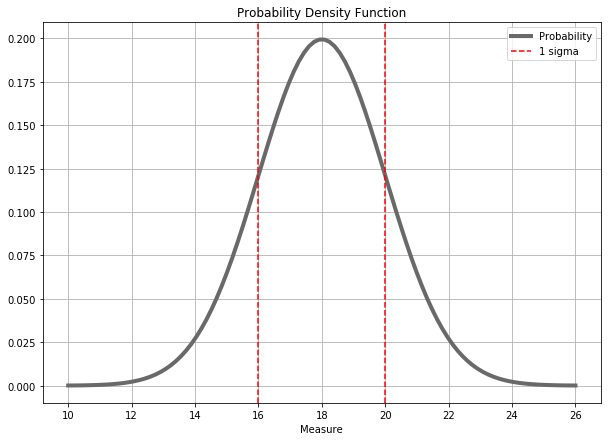

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
%matplotlib inline

# define constants
mean = 18
sigma = 2

# create the independent variable array
x = np.linspace(mean - 4*sigma, mean + 4*sigma, 100)

# calculate and plot the pdf
plt.plot(x, norm.pdf(x, mean, sigma), label='Probability', linewidth=4, color='dimgray')
plt.axvline(x= mean - sigma, color='r', linestyle='--', label = '1 sigma')
plt.axvline(x= mean + sigma, color='r', linestyle='--')
plt.grid(True)
plt.xlabel("Measure")
leg = plt.legend()
fig = plt.gcf()
plt.title('Probability Density Function')
fig.set_size_inches(10,7)
plt.show()

A key property of the Gaussian function is exploited at this point: the product of two gaussian functions is another gussian function. Measures can be fused with estimations to make a better state determination

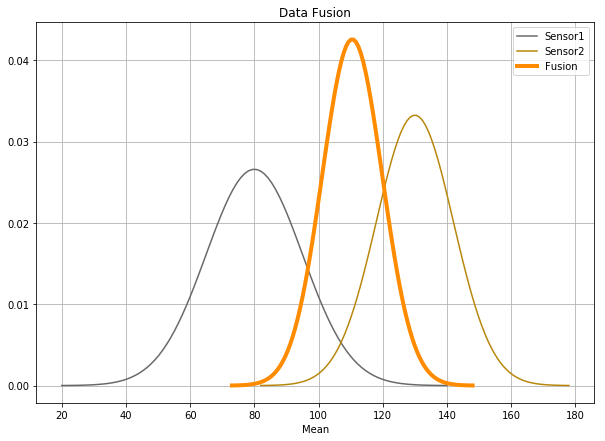

,Source,Mean,Sigma
0,Sensor 1,80.000000,15.000000
1,Sensor 2,130.000000,12.000000
2,Fusion,110.487805,9.370426


In [2]:
# define constants
mean1 = 80
sigma1 = 15
mean2 = 130
sigma2 = 12

# the update function
def update(mean1, sigma1, mean2, sigma2):
    ''' This function takes in two means and two standard deviation terms and returns updated gaussian parameters.'''
    var1 = sigma1*sigma1
    var2 = sigma2*sigma2
    new_mean = (var2*mean1 + var1*mean2)/(var2+var1)
    new_sigma = math.sqrt(1/(1/var2 + 1/var1))  
    return [new_mean, new_sigma]

new_mean, new_sigma = update(mean1, sigma1, mean2, sigma2)

x1 = np.linspace(mean1 - 4*sigma1, mean1 + 4*sigma1, 100)
x2 = np.linspace(mean2 - 4*sigma2, mean2 + 4*sigma2, 100)
x3 = np.linspace(new_mean - 4*new_sigma, new_mean + 4*new_sigma, 100)

plt.plot(x1, norm.pdf(x1, mean1, sigma1), label='Sensor1', color='dimgray')
plt.plot(x2, norm.pdf(x2, mean2, sigma2), label='Sensor2', color='darkgoldenrod')
plt.plot(x3, norm.pdf(x3, new_mean, new_sigma), label = 'Fusion', linewidth=4, color='darkorange')
plt.grid(True)
plt.xlabel("Mean")
leg = plt.legend()
fig = plt.gcf()
plt.title('Data Fusion')
fig.set_size_inches(10,7)
plt.show()

import pandas as pd
data = [["Sensor 1", mean1, sigma1], ["Sensor 2", mean2, sigma2], ["Fusion", new_mean, new_sigma]]
df = pd.DataFrame(data,columns=["Source","Mean","Sigma"])
df